#### Mariana Quiroga Londono 
#### FBM MNCs 
#### 20210420

In [1]:
#SETTING ENVIRONMENT 

import rpy2
#import tzlocal
#%load_ext rpy2.ipython

import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
#sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, dpi_save=1000)

/usr/local/lib/python3.7/dist-packages/numba/core/cpu.py:77: UserWarning: Numba extension module 'sparse._numba_extension' failed to load due to 'ModuleNotFoundError(No module named 'numba.targets')'.
  numba.core.entrypoints.init_all()


In [2]:
from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

In [3]:
#Read object and metadata
mrna_adata = sc.read("./Simone_data/fbm_mnc_citeseq_rna_pp_clus_20201208.h5ad")
labels = pd.read_csv("./Simone_data/fbm_mnc_meta_with_annot_20201208.csv",index_col="Unnamed: 0")
mrna_adata.obs["cell.labels"] = labels["cell.labels"]
cell_names = [x[:-2] for x in mrna_adata.obs_names]
mrna_adata.obs_names = cell_names
mrna_adata.obs

/usr/local/lib/python3.7/dist-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['distances'] to .obsp['distances'].

This is where adjacency matrices should go now.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/anndata/compat/__init__.py:161: FutureWarning: Moving element from .uns['neighbors']['connectivities'] to .obsp['connectivities'].

This is where adjacency matrices should go now.
  FutureWarning,


,souporcell_doublet,souporcell_assignment,orig.ident,lanes,sequencing.type,sex,mad_prd,auto_prd,is_doublet,nUMI,nGene,percent.mito,nUMI_protein,nAb,leiden,__is_in_cluster__,cell.labels
AAACCCAAGAGCATAT,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,8763.0,2712,0.013580,414.0,83,10,False,pre B progenitor
AAACCCAAGGACTGGT,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,44958.0,4893,0.028739,1452.0,93,1,False,early erythroid
AAACCCAAGGTCATAA,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,41561.0,4971,0.021294,1430.0,94,1,False,early erythroid
AAACCCACAAGCGAAC,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,14068.0,3244,0.012511,266.0,87,12,False,pre B progenitor
AAACCCACAATCTCTT,singlet,0,sample_1,SIGAH2_SIGAH12,3prime,female,False,False,False,5477.0,2267,0.015154,374.0,81,18,False,pre pro B progenitor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTTGCAGTCAGCC,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,17406.0,3492,0.019419,968.0,136,9,False,MOP
TTTGTTGCATCCTAAG,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,21899.0,4560,0.037216,1040.0,139,7,False,promonocyte
TTTGTTGCATGAGATA,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,16615.0,2236,0.007704,272.0,76,19,False,mid erythroid
TTTGTTGTCAAATGAG,singlet,1,sample_2,SIGAH2_SIGAH12,3prime,male,False,False,False,10972.0,2582,0.033722,430.0,109,0,False,CD14 monocyte


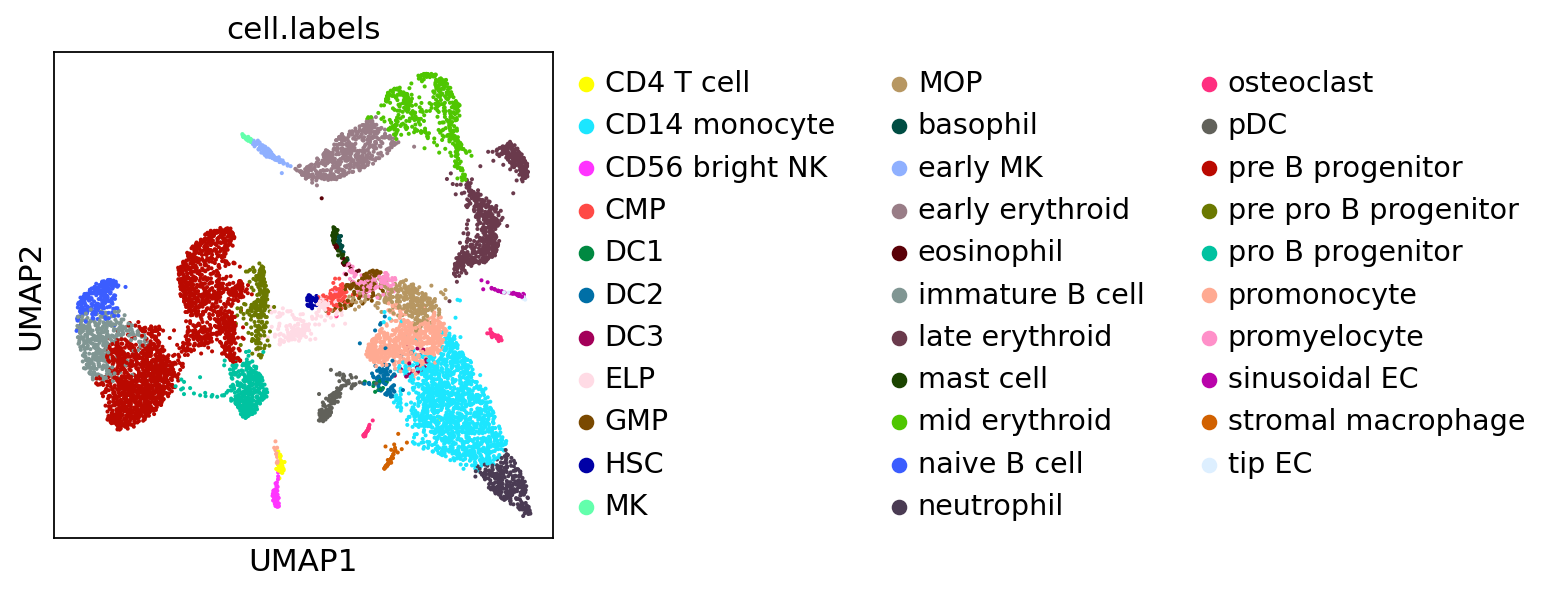

In [38]:
sc.pl.umap(mrna_adata,color=["cell.labels"], ncols=5, cmap=cmap)

In [5]:
mrna_adata

AnnData object with n_obs × n_vars = 8986 × 36601
    obs: 'souporcell_doublet', 'souporcell_assignment', 'orig.ident', 'lanes', 'sequencing.type', 'sex', 'mad_prd', 'auto_prd', 'is_doublet', 'nUMI', 'nGene', 'percent.mito', 'nUMI_protein', 'nAb', 'leiden', '__is_in_cluster__', 'cell.labels'
    var: 'gene_ids', 'feature_types', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'leiden', 'leiden_colors', 'neighbors', 'orig.ident_colors', 'pca', 'rank_genes_groups', 'rank_genes_groups_filtered', 'cell.labels_colors'
    obsm: 'X_orig_pca', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [6]:
DSB_output0=sc.read("010221_mq224_postQC_postDSB_postUMAP_celllabels_MNCs_ADTonmRNA_xSimone.h5ad")

### For decision tree 

In [26]:
DSB_output0.obs["cell.labels.sorted"].cat.categories

Index(['early erythroid', 'mid erythroid', 'late erythroid', 'early MK', 'MK',
       'tip EC', 'sinusoidal EC', 'osteoclast', 'stromal macrophage',
       'eosinophil', 'basophil', 'mast cell', 'DC1', 'DC2', 'DC3', 'pDC',
       'HSC', 'CMP', 'GMP', 'MOP', 'ELP', 'promonocyte', 'CD14 monocyte',
       'promyelocyte', 'neutrophil', 'pre pro B progenitor',
       'pro B progenitor', 'pre B progenitor', 'immature B cell',
       'naive B cell', 'CD4 T cell', 'CD56 bright NK'],
      dtype='object')

In [27]:
DSB_output0.obs["cell.labels.sorted.2"] = DSB_output0.obs["cell.labels.sorted"]
DSB_output0.obs["cell.labels.sorted.2"] = ['CD38-pro.' if 'HSC' in x else x for x in DSB_output0.obs["cell.labels.sorted.2"]]
DSB_output0.obs["cell.labels.sorted.2"] = ['CD38+pro.' if 'CMP' in x else x for x in DSB_output0.obs["cell.labels.sorted.2"]]
DSB_output0.obs["cell.labels.sorted.2"] = ['CD38+pro.' if 'GMP' in x else x for x in DSB_output0.obs["cell.labels.sorted.2"]]
DSB_output0.obs["cell.labels.sorted.2"] = ['CD38+pro.' if 'ELP' in x else x for x in DSB_output0.obs["cell.labels.sorted.2"]]

In [28]:
DSB_output0.obs["cell.labels.sorted.2"]=DSB_output0.obs["cell.labels.sorted.2"].astype('category')

In [31]:
DSB_output0

AnnData object with n_obs × n_vars = 8978 × 198
    obs: 'leiden', 'louvain', 'assignment', 'cell.labels', 'cell.labels.sorted', 'cell.labels.sorted.2'
    var: 'bg_mean'
    uns: 'assignment_colors', 'draw_graph', 'leiden', 'leiden_colors', 'louvain', 'neighbors', 'pca', 'umap'
    obsm: 'X_draw_graph_fa', 'X_pca', 'X_umap', 'umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [29]:
DSB_output0.obs["cell.labels.sorted.2"].cat.categories

Index(['CD14 monocyte', 'CD38+pro.', 'CD38-pro.', 'CD4 T cell',
       'CD56 bright NK', 'DC1', 'DC2', 'DC3', 'MK', 'MOP', 'basophil',
       'early MK', 'early erythroid', 'eosinophil', 'immature B cell',
       'late erythroid', 'mast cell', 'mid erythroid', 'naive B cell',
       'neutrophil', 'osteoclast', 'pDC', 'pre B progenitor',
       'pre pro B progenitor', 'pro B progenitor', 'promonocyte',
       'promyelocyte', 'sinusoidal EC', 'stromal macrophage', 'tip EC'],
      dtype='object')

In [37]:
test = DSB_output0.obs.groupby(['cell.labels.sorted.2']).apply(len)
test

cell.labels.sorted.2
CD14 monocyte           1384
CD38+pro.                363
CD38-pro.                 36
CD4 T cell                39
CD56 bright NK            66
DC1                       13
DC2                       87
DC3                       20
MK                        31
MOP                      280
basophil                  15
early MK                  91
early erythroid          517
eosinophil                22
immature B cell          403
late erythroid           670
mast cell                 57
mid erythroid            466
naive B cell             249
neutrophil               294
osteoclast                58
pDC                      139
pre B progenitor        2241
pre pro B progenitor     248
pro B progenitor         366
promonocyte              620
promyelocyte             103
sinusoidal EC             42
stromal macrophage        47
tip EC                    11
dtype: int64

In [106]:
test =['CD14 monocyte', 'CD38+pro.', 'CD38-pro.', 'CD4 T cell',
       'CD56 bright NK', 'DC1', 'DC2', 'DC3', 'MK', 'MOP', 'basophil',
       'early MK', 'early erythroid', 'eosinophil', 'immature B cell',
       'late erythroid', 'mast cell', 'mid erythroid', 'naive B cell',
       'neutrophil', 'osteoclast', 'pDC', 'pre B progenitor',
       'pre pro B progenitor', 'pro B progenitor', 'promonocyte',
       'promyelocyte', 'sinusoidal EC', 'stromal macrophage', 'tip EC']


In [107]:
new_order=["CD38-pro.","CD38+pro.","eosinophil","basophil","mast cell","early MK","MK","early erythroid","mid erythroid","late erythroid","CD4 T cell","CD56 bright NK","pre pro B progenitor","pro B progenitor","pre B progenitor","immature B cell","naive B cell","pDC","DC1","DC2","DC3","MOP","promonocyte","CD14 monocyte","promyelocyte","neutrophil","stromal macrophage","osteoclast","sinusoidal EC","tip EC"]

In [108]:


DSB_output0.obs["cell.labels.sorted.2"] = DSB_output0.obs["cell.labels.sorted.2"].cat.reorder_categories(new_order)

In [109]:
DSB_output0.obs["cell.labels.sorted.2"].cat.categories

Index(['CD38-pro.', 'CD38+pro.', 'eosinophil', 'basophil', 'mast cell',
       'early MK', 'MK', 'early erythroid', 'mid erythroid', 'late erythroid',
       'CD4 T cell', 'CD56 bright NK', 'pre pro B progenitor',
       'pro B progenitor', 'pre B progenitor', 'immature B cell',
       'naive B cell', 'pDC', 'DC1', 'DC2', 'DC3', 'MOP', 'promonocyte',
       'CD14 monocyte', 'promyelocyte', 'neutrophil', 'stromal macrophage',
       'osteoclast', 'sinusoidal EC', 'tip EC'],
      dtype='object')

In [112]:
markers_ab=["CD1d", "CD9", "CD10", "CD16", "CD19","CD24","CD33","CD34","CD35","CD38","CD39","CD43","CD45RA","CD45RB", "CD49b","CD49d","CD71","CD72","CD73", "CD82","CD93","CD99","CD102","CD117","CD119","CD123","CD158f","CD183", "CD244", "CD273","CD275","CD284","CD326","CD370", "CLEC1B" ,"Fc_epsilon","Folate","HLA_DR","IgM"]

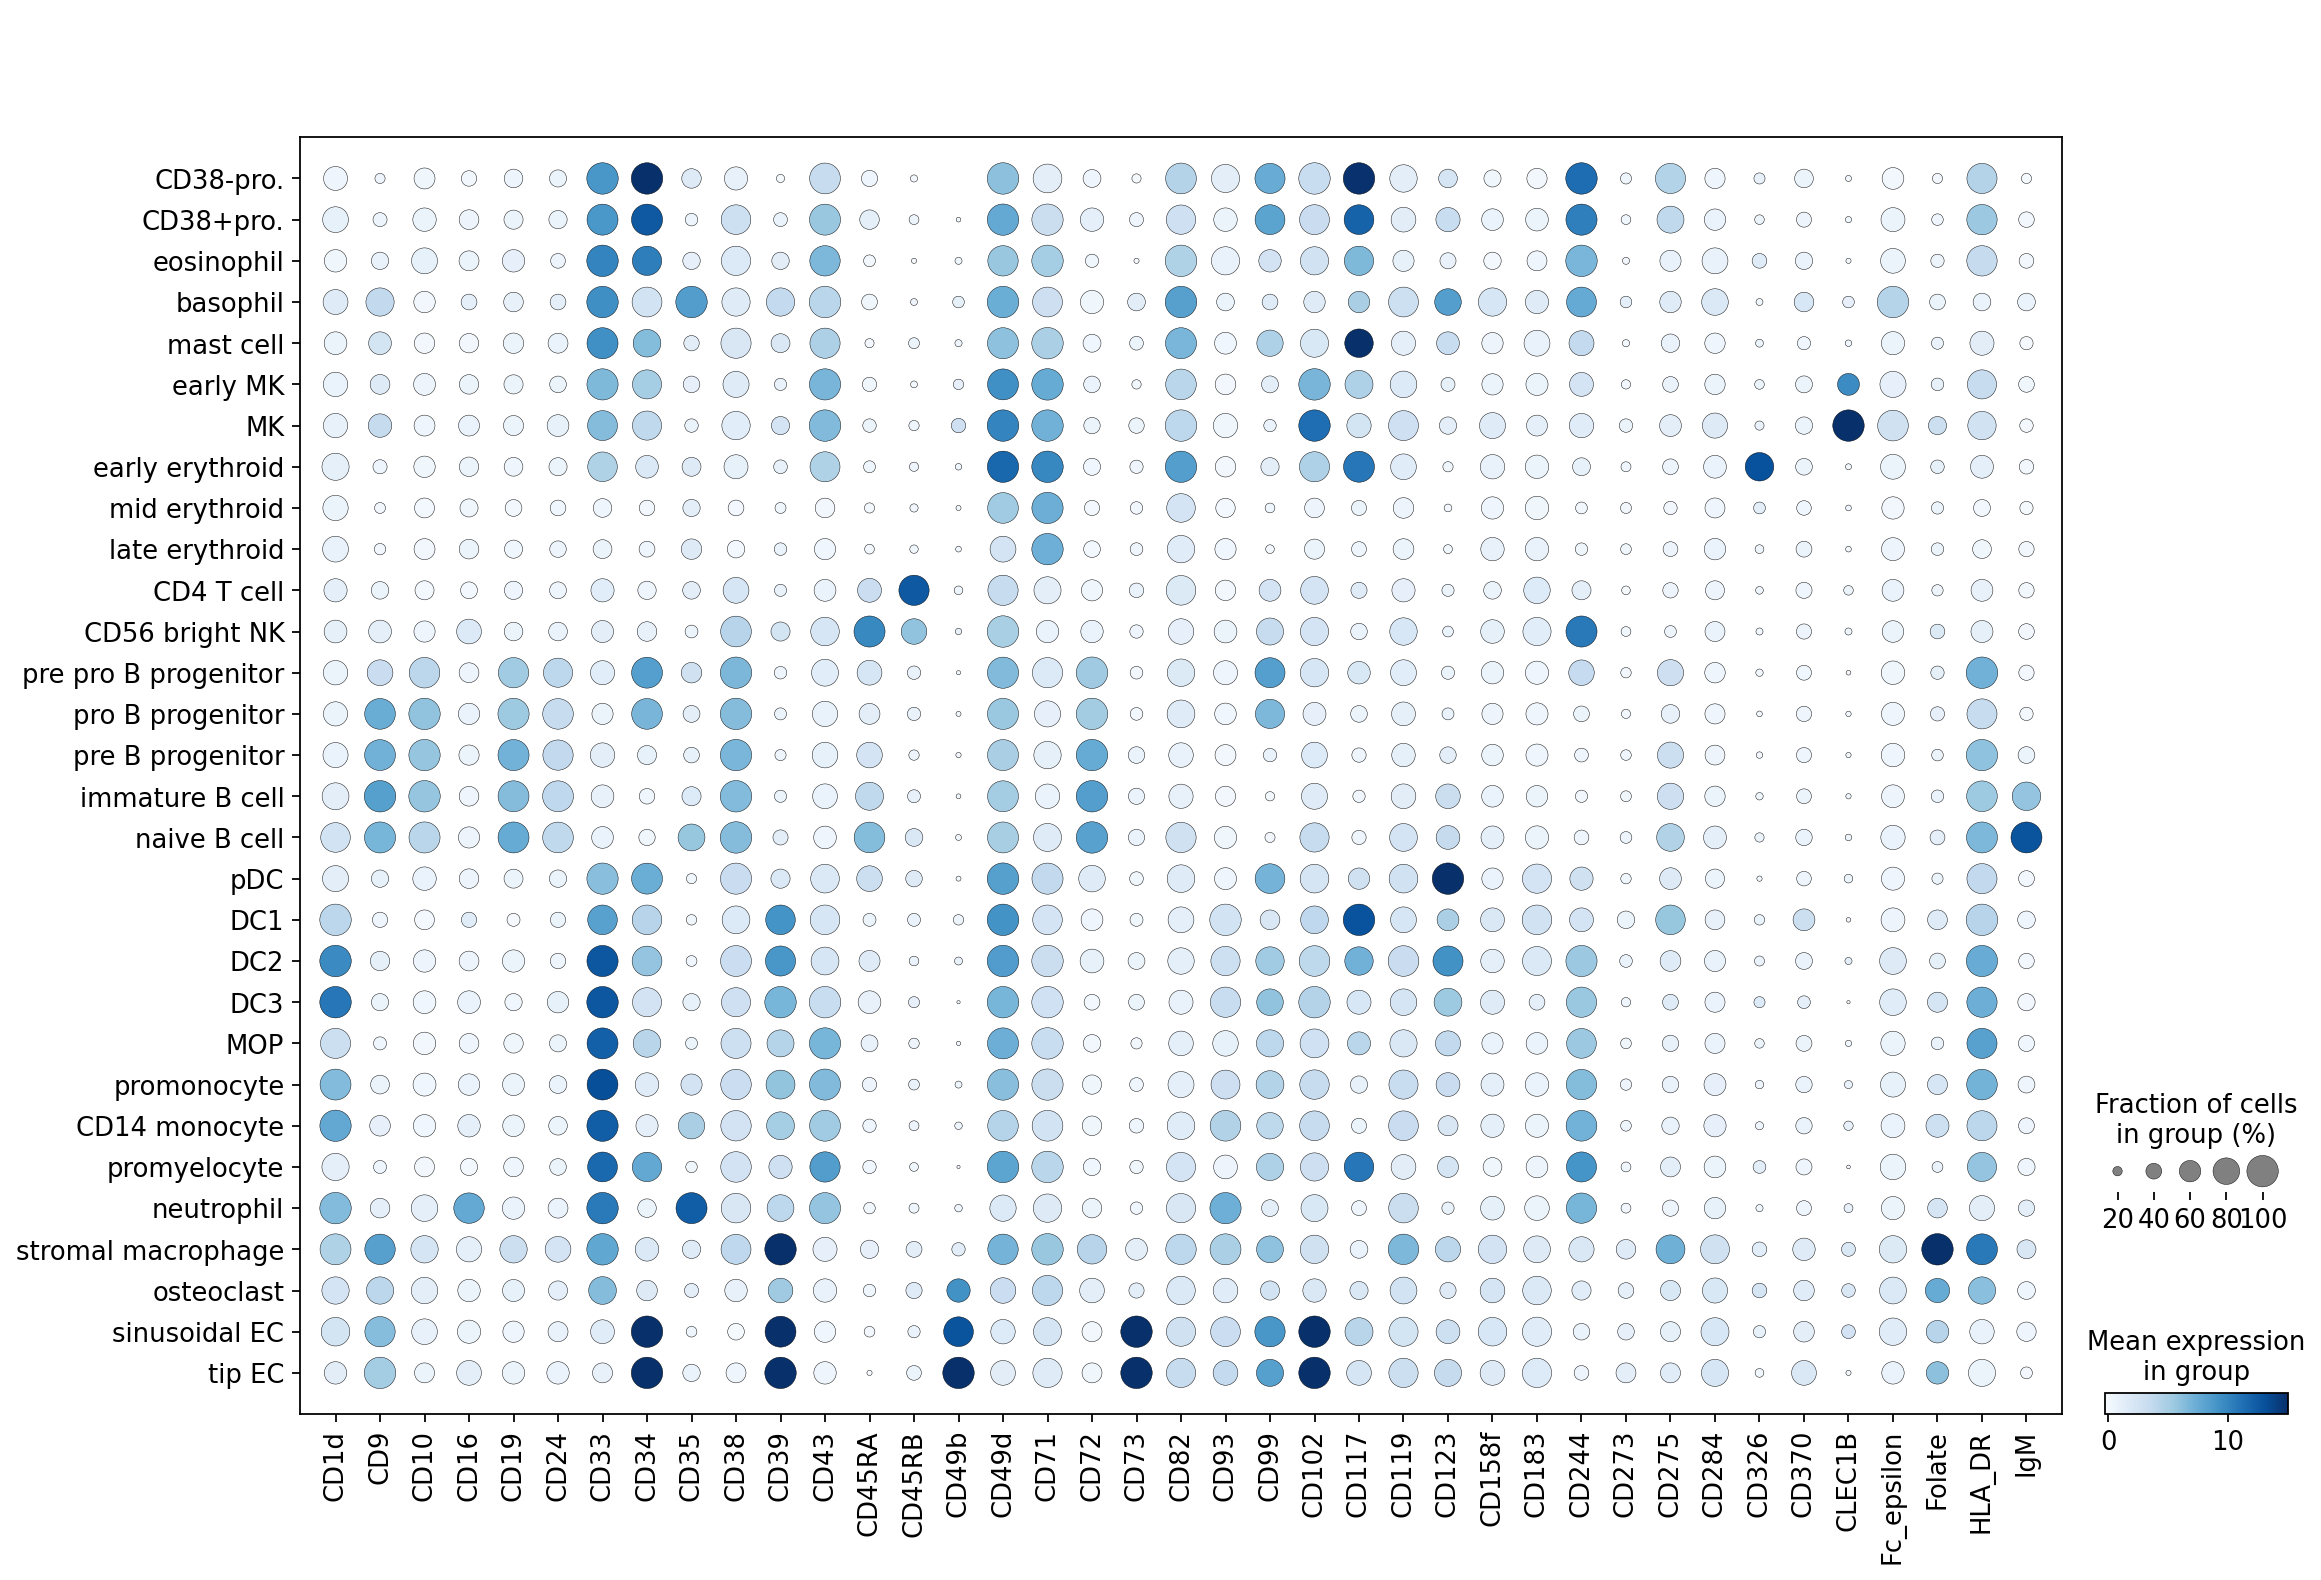

In [113]:
sc.pl.dotplot(DSB_output0, var_names=markers_ab, groupby="cell.labels.sorted.2",cmap="Blues", vmax=15, save="20210422_Fig_ADT_MNCs_FBM_dotplot_selectedmarkers.pdf")

In [114]:
pwd

'/rds/project/rds-SDzz0CATGms/users/mq224/HCA_project/BM/Stage3_demultiplexing/ADT/Xiaonan_test_FBM3_MNCs'